![Net Image](https://www.lynchburg.edu/wp-content/uploads/statistics-and-data-science/banner-statistics-and-data-science-1.jpg "Banner | Proyecto 1")

## Reporte | Proyecto 2 <img src="https://media.tenor.com/dHk-LfzHrtwAAAAi/linux-computer.gif" alt="drawing" width="30"/>

In [1]:
from database import obtain_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Information: Database connection succeeded


### Obtención del Dataset

In [2]:
df = obtain_dataset()
df

,Date,Department,Town,Number_DeathSource1,Number_DeathSource2,Acumulative_DeathSource1,Acumulative_DeathSource2,Population
0,2020-03-15,GUATEMALA,SAN PEDRO SACATEPEQUEZ,1,0,1,0,54623
1,2020-03-15,SACATEPEQUEZ,SAN LUCAS SACATEPEQUEZ,0,0,1,0,28445
2,2020-03-15,GUATEMALA,GUATEMALA,0,0,1,0,1205668
3,2020-03-15,ESCUINTLA,PALIN,0,0,1,0,70118
4,2020-03-15,EL PROGRESO,SAN AGUSTIN ACASAGUASTLAN,0,0,1,0,54588
...,...,...,...,...,...,...,...,...
86604,2020-12-31,QUICHE,SAN BARTOLOME JOCOTENANGO,0,22,5951,4803,15586
86605,2020-12-31,QUETZALTENANGO,SAN MIGUEL SIGÜILA,0,22,5951,4803,9607
86606,2020-12-31,SOLOLA,SAN PABLO LA LAGUNA,0,22,5951,4803,7950
86607,2020-12-31,ALTA VERAPAZ,TAMAHU,0,22,5951,4803,23858


### Información del Dataset

In [3]:
df.head()
df.tail()
df.info()
df.nunique()
(df.isnull().sum()/len(df))*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86609 entries, 0 to 86608
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      86609 non-null  datetime64[ns]
 1   Department                86609 non-null  object        
 2   Town                      86609 non-null  object        
 3   Number_DeathSource1       86609 non-null  int64         
 4   Number_DeathSource2       86609 non-null  int64         
 5   Acumulative_DeathSource1  86609 non-null  object        
 6   Acumulative_DeathSource2  86609 non-null  int64         
 7   Population                86609 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 5.3+ MB


Date                        0.0
Department                  0.0
Town                        0.0
Number_DeathSource1         0.0
Number_DeathSource2         0.0
Acumulative_DeathSource1    0.0
Acumulative_DeathSource2    0.0
Population                  0.0
dtype: float64

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Acumulative_DeathSource1'] = df['Acumulative_DeathSource1'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86609 entries, 0 to 86608
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      86609 non-null  datetime64[ns]
 1   Department                86609 non-null  object        
 2   Town                      86609 non-null  object        
 3   Number_DeathSource1       86609 non-null  int64         
 4   Number_DeathSource2       86609 non-null  int64         
 5   Acumulative_DeathSource1  86609 non-null  int64         
 6   Acumulative_DeathSource2  86609 non-null  int64         
 7   Population                86609 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 5.3+ MB


### Resumen estadístico

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,86609,2020-08-24 06:09:48.326848256,2020-03-15 00:00:00,2020-06-22 00:00:00,2020-08-25 00:00:00,2020-10-28 00:00:00,2020-12-31 00:00:00,NaN
Number_DeathSource1,86609.0,0.068711,0.0,0.0,0.0,0.0,27.0,0.55669
Number_DeathSource2,86609.0,18.63035,0.0,7.0,16.0,27.0,61.0,14.440607
Acumulative_DeathSource1,86609.0,3209.7393,1.0,875.0,3878.0,5136.0,5951.0,2118.694661
Acumulative_DeathSource2,86609.0,2260.054475,0.0,514.0,2611.0,3665.0,4803.0,1601.726163
Population,86609.0,49971.442136,2563.0,17465.0,30912.0,58526.0,1205668.0,81461.793846


### Separación de datos

In [6]:
qualitative_data = df.select_dtypes(include=['object', 'datetime64']).columns
quantative_data = df.select_dtypes(include=[np.number]).columns
print(qualitative_data)
print(quantative_data)

Index(['Date', 'Department', 'Town'], dtype='object')
Index(['Number_DeathSource1', 'Number_DeathSource2',
       'Acumulative_DeathSource1', 'Acumulative_DeathSource2', 'Population'],
      dtype='object')


## EDA Monovariable

### Datos cuantitativos

Number_DeathSource1
Skew:  22.08


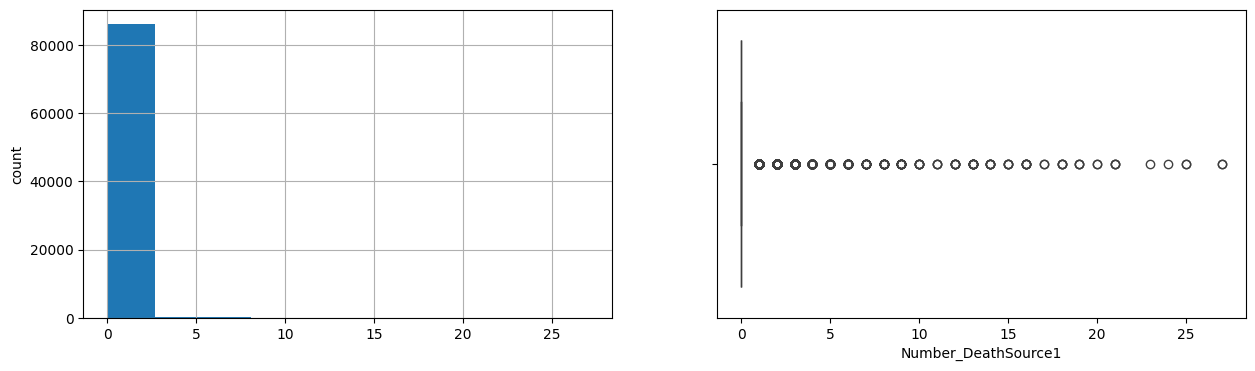

Number_DeathSource2
Skew:  0.78


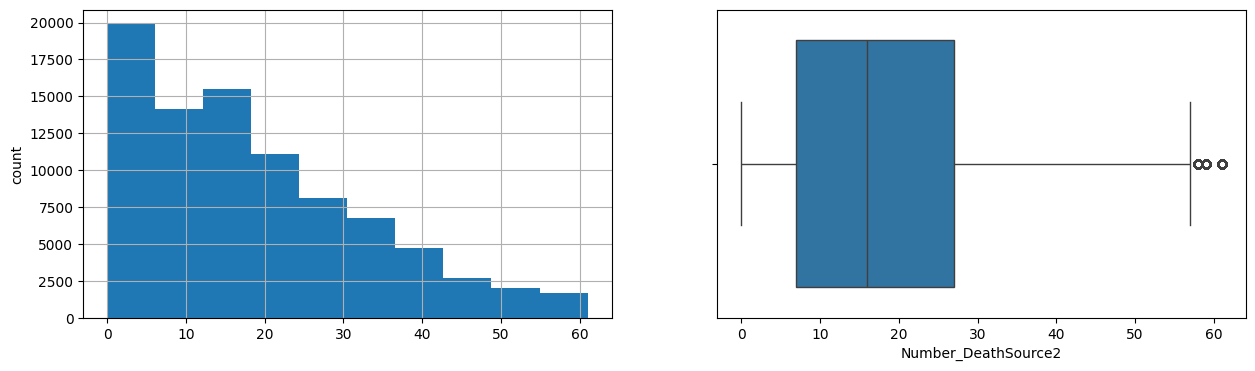

Acumulative_DeathSource1
Skew:  -0.35


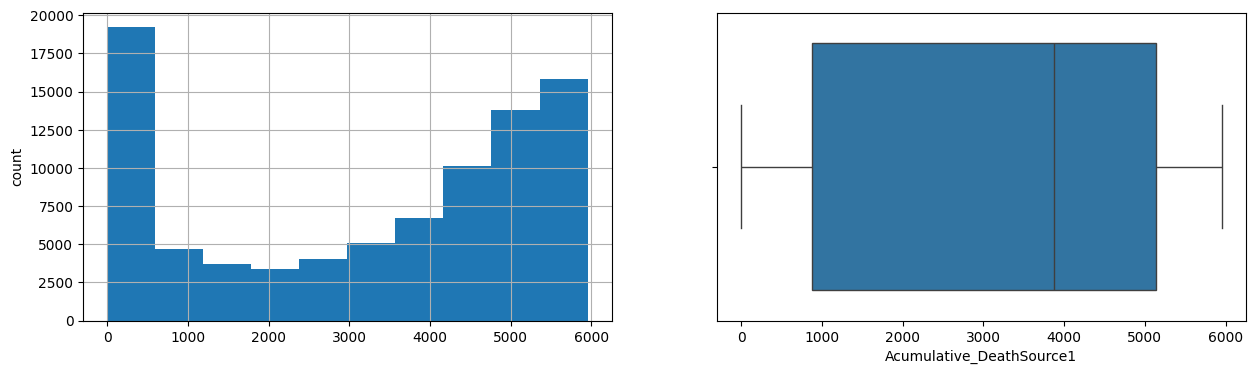

Acumulative_DeathSource2
Skew:  -0.14


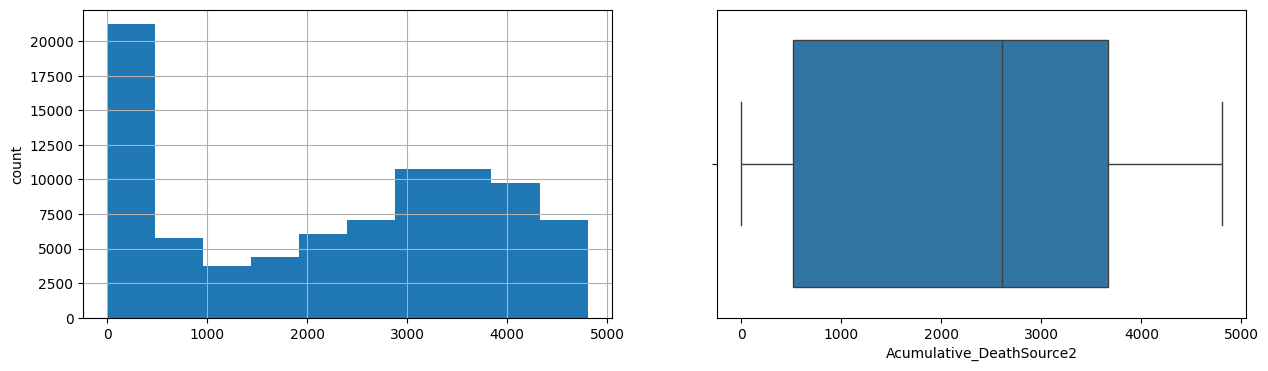

Population
Skew:  9.55


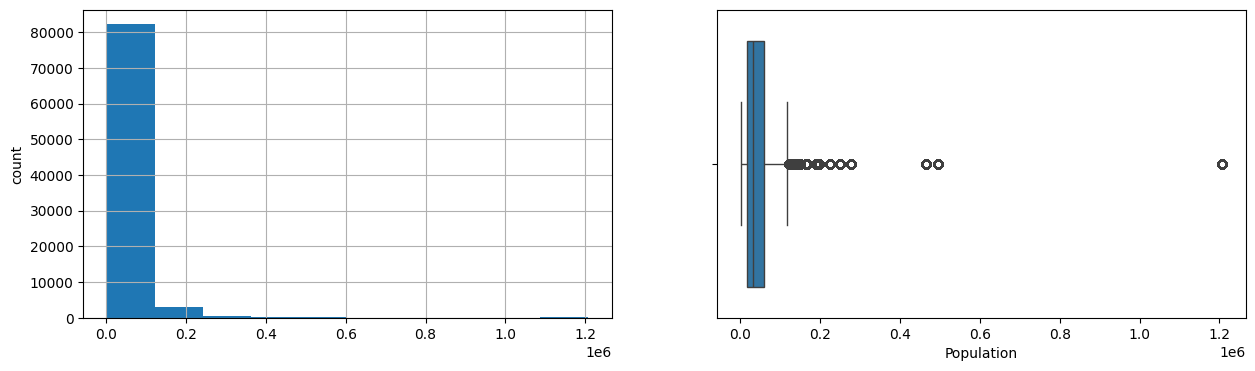

In [7]:
for col in quantative_data:
    print(col)
    print('Skew: ', round(df[col].skew(),2))
    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    df[col].hist()
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

### Datos cualitativos

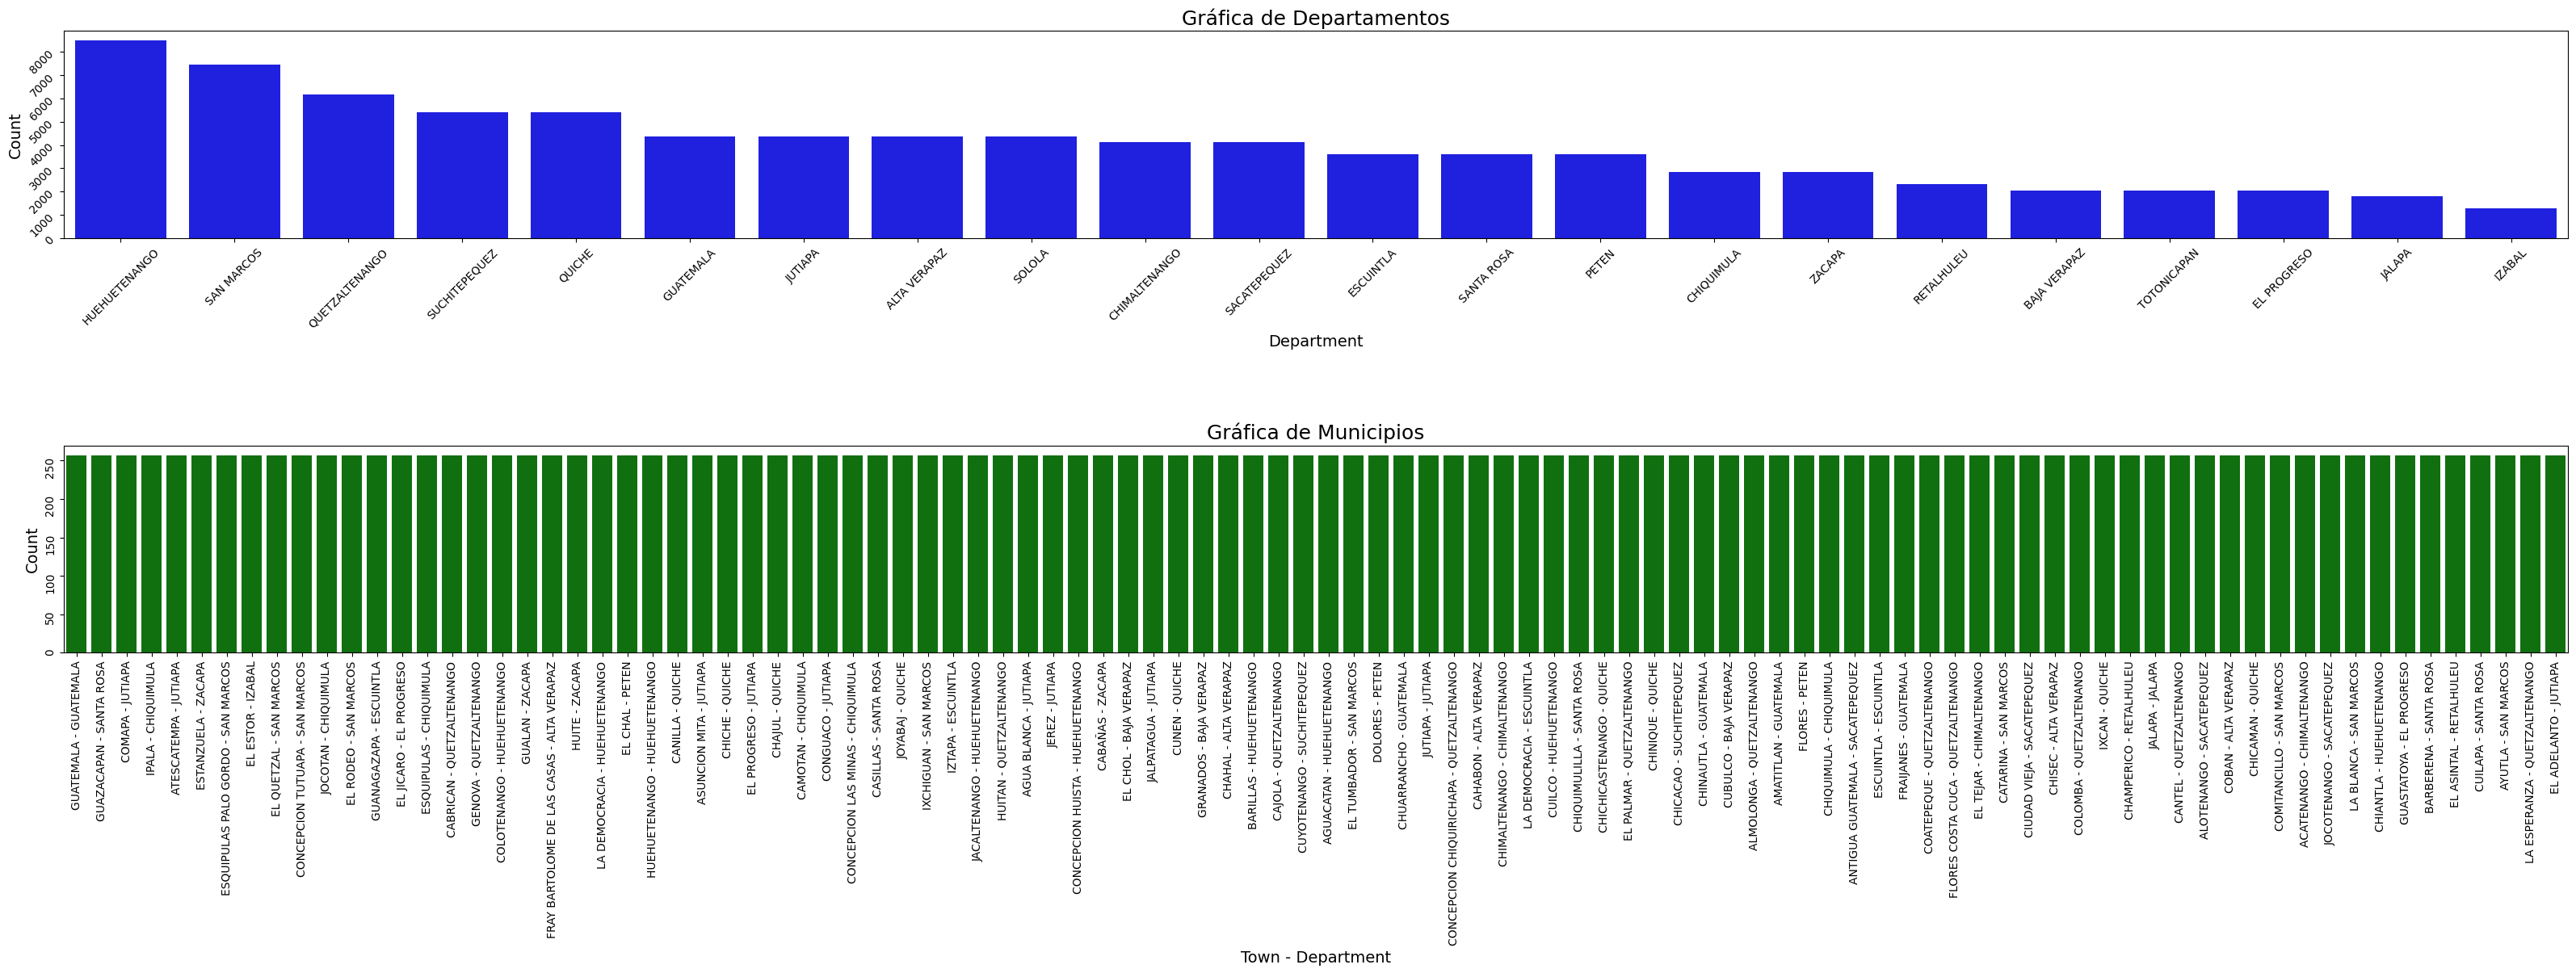

In [8]:
top_100_town = df.groupby(['Town', 'Department']).size().nlargest(100).index.get_level_values(0)
df_top_100_town = df[df['Town'].isin(top_100_town)].copy()

fig, axes = plt.subplots(2, 1, figsize=(40, 10))

sns.countplot(ax=axes[0], x='Department', data=df, color='blue', order=df['Department'].value_counts().index)
axes[0].tick_params(labelrotation=45)
axes[0].set_title('Gráfica de Departamentos', fontsize=18)
axes[0].set_xlabel('Department', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

df_top_100_town['Town_Department'] = df_top_100_town['Town'] + ' - ' + df_top_100_town['Department']
town_order = df_top_100_town['Town_Department'].value_counts().index
sns.countplot(ax=axes[1], x='Town_Department', data=df_top_100_town, color='green', order=town_order)
axes[1].tick_params(labelrotation=90)
axes[1].set_title('Gráfica de Municipios', fontsize=18)
axes[1].set_xlabel('Town - Department', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

plt.subplots_adjust(hspace=1)
plt.show()


##### Observaciones/Insights

- En la gráfica de frecuencia de apariciones en el data set por parte de municipios, se tiene una igualdad de todos los municipios al cada uno contar con 257 apariciones en el data set, por lo que la recopilación de datos es exacta en cada uno de los mismos, por lo que asegura una buena base de datos equivalente.

- En la primera gráfica cualitativa se observa que los departamentos con más frecuencia de apariciones en los datos fueron, Huehuetenango, San Marcos, Quetzaltenango, Suchitepequez, Quiché y Guatemala, estos llegando a un promedio aproximado de 6000 datos, esta no cuenta con equivalencia de datos debido a que todos los departamentos no tienen la misma cantidad de municipios.


## Transformación

### Outliers

Number_DeathSource1
Skew:  0.98


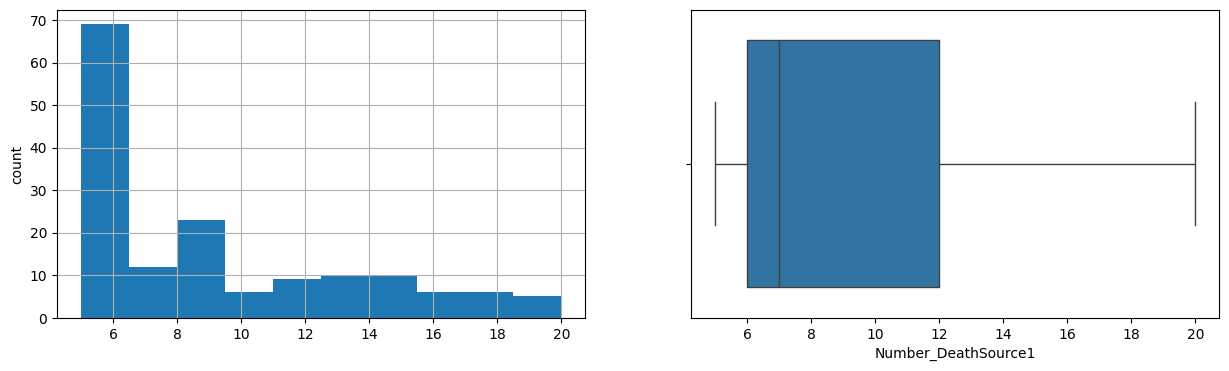

Population
Skew:  -0.93


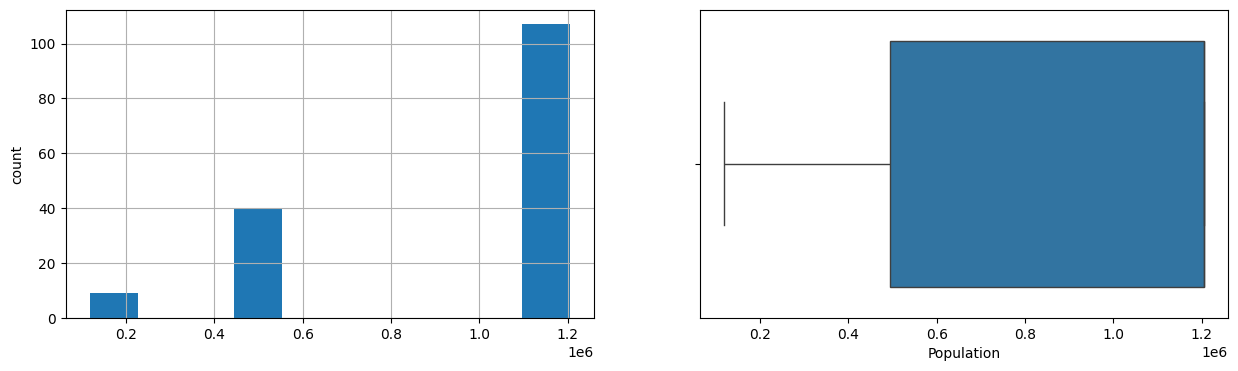

In [9]:
# Number_DeathSource1 outliers
df = df[(df['Number_DeathSource1'] >= 5) & (df['Number_DeathSource1'] <= 20)]

# Population outliers
Population_Q1 = df['Population'].quantile(0.25)
Population_Q3 = df['Population'].quantile(0.75)
Population_IQR = Population_Q3 - Population_Q1

Population_lower_limit = Population_Q1 - 1.5 * Population_IQR
Population_upper_limit = Population_Q3 + 1.5 * Population_IQR
df = df[(df['Population'] >= Population_lower_limit) & (df['Population'] <= Population_upper_limit)]

for col in ['Number_DeathSource1', 'Population']:
    print(col)
    print('Skew: ', round(df[col].skew(),2))
    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    df[col].hist()
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

## EDA Multivariable

### Datos cuantitativos

<Figure size 1500x1700 with 0 Axes>

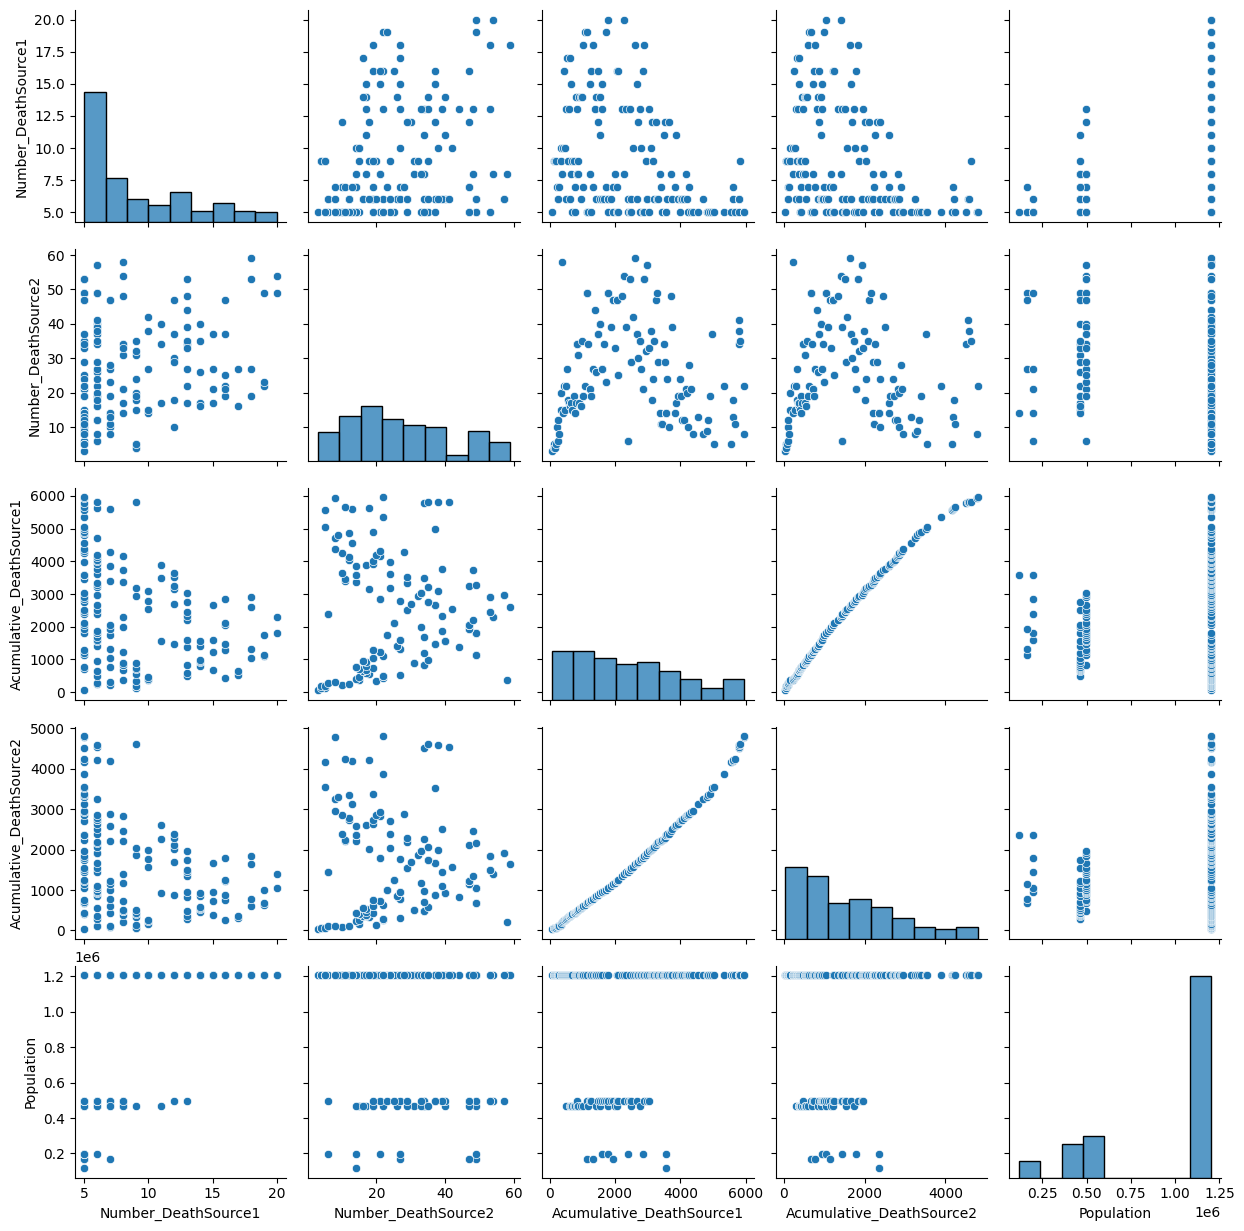

In [10]:
plt.figure(figsize=(15,17))
sns.pairplot(data=df)
plt.show()

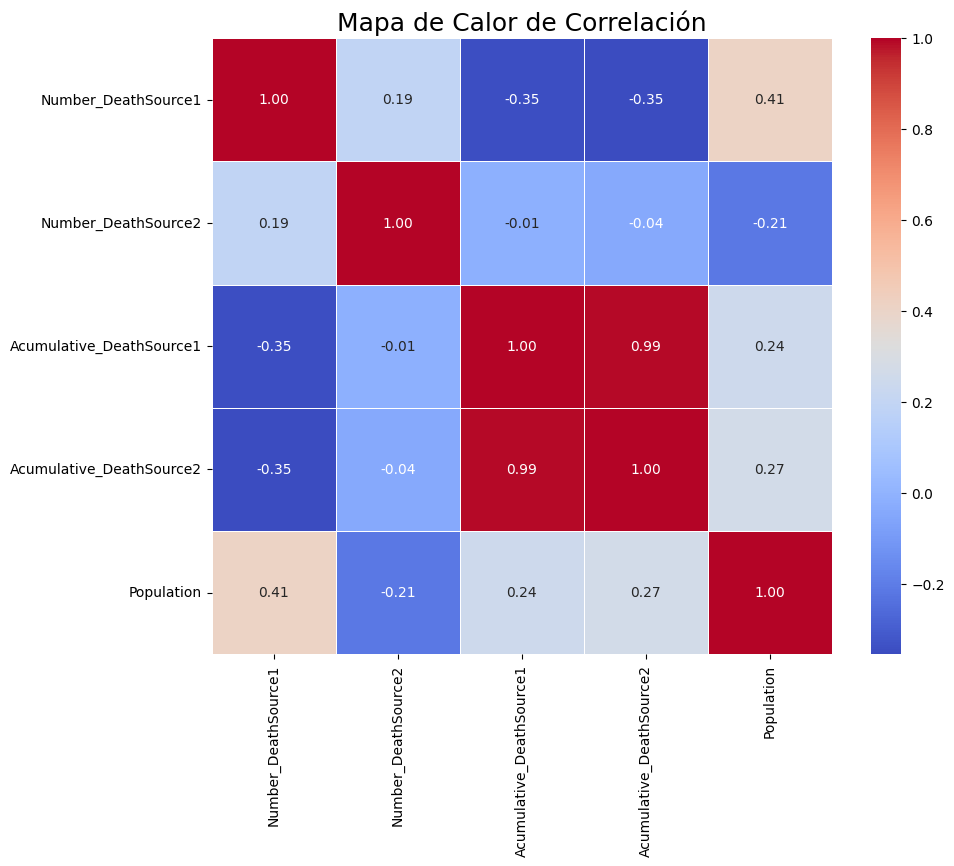

In [11]:
selected_columns = ['Number_DeathSource1', 'Number_DeathSource2', 'Acumulative_DeathSource1', 'Acumulative_DeathSource2', 'Population']
corr_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Mapa de Calor de Correlación', fontsize=18)
plt.show()

##### Observaciones/Insights

- Número de muertes nuevas de la fuente 1 y población existe una correlación positiva moderada (0.41) entre el número de muertes registradas por la fuente 1 y la población. Esto podría indicar que en áreas más pobladas, hay más casos de muertes según la fuente 1.

- Número de muertes de la fuente 2 y población, la correlación entre el número de muertes según la fuente 2 y la población es negativa (-0.21). Esto sugiere una relación inversa, lo que significa que en áreas más pobladas, puede haber menos casos de muertes según la fuente 2.

- Número de muertes acumuladas fuente 1 y número de muertes acumuladas de la fuente 2 hay una correlación positiva muy fuerte (0.99) entre el número de muertes acumuladas según la Fuente 1 y la fuente 2. Esto indica que ambos conjuntos de datos están altamente relacionados en cuanto a las muertes acumuladas.

- Número de muertes fuente 1 y número de muertes acumuladas fuente 1, existe una correlación negativa moderada (-0.35) entre el número de muertes según la fuente 1 y las muertes acumuladas según la fuente 1. Esto puede ser debido a variaciones en la forma en que se registran las muertes en ambas categorías.

- Número de muertes fuente 2 y número de muertes acumuladas fuente 2, similar al caso anterior, hay una correlación negativa moderada (-0.35) entre el número de muertes según la fuente 2 y las muertes acumuladas según la fuente 2. Esto puede indicar diferencias en la metodología de registro o en la temporalidad de los datos.

### Datos cualitativos

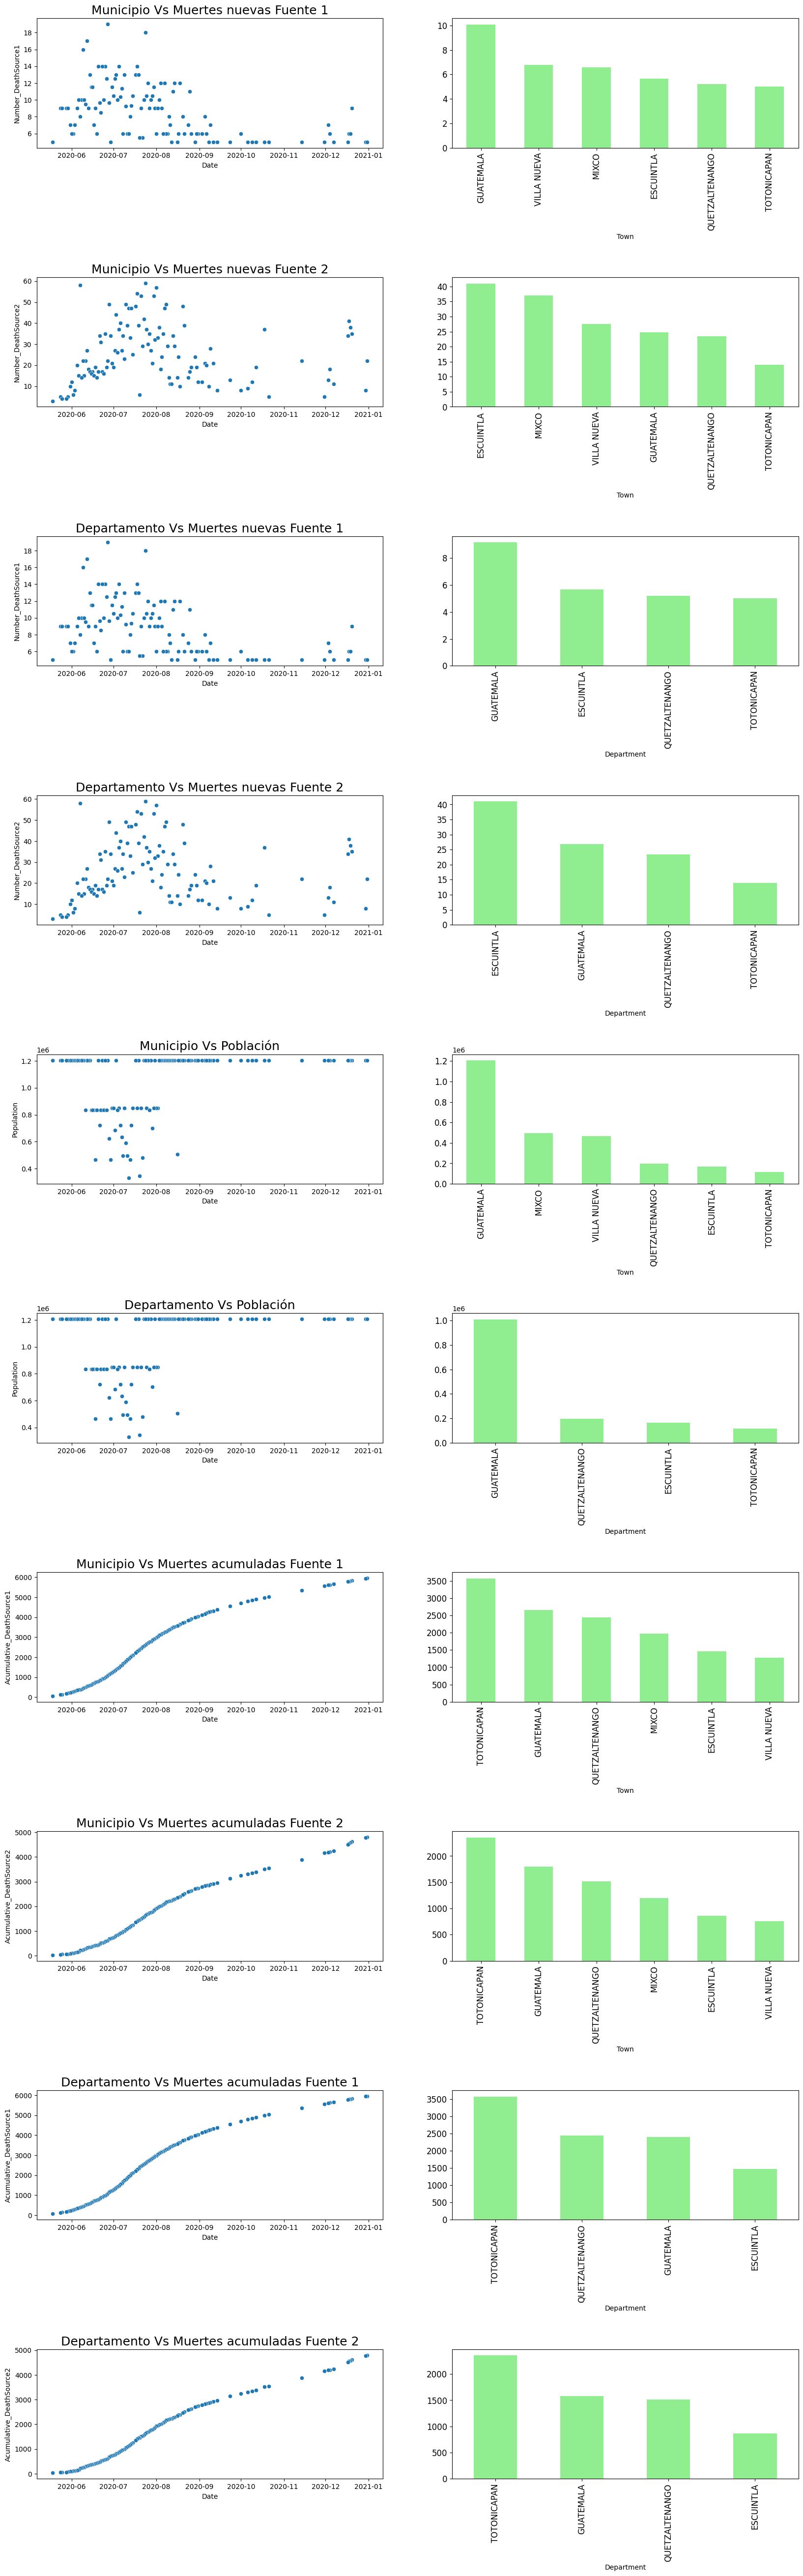

In [12]:
fig, axarr = plt.subplots(10, 2, figsize=(20, 65))

def add_scatter_plot(ax, x, y, data, title):
    sns.scatterplot(x=x, y=y, data=data, ax=ax)
    ax.set_title(title, fontsize=18)

axarr[0, 1] = df.groupby('Town')['Number_DeathSource1'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[0, 0], x='Date', y='Number_DeathSource1', data=df.groupby('Date')['Number_DeathSource1'].mean().sort_values(ascending=False).reset_index(), title="Municipio Vs Muertes nuevas Fuente 1")

axarr[1, 1] = df.groupby('Town')['Number_DeathSource2'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[1, 0], x='Date', y='Number_DeathSource2', data=df.groupby('Date')['Number_DeathSource2'].mean().sort_values(ascending=False).reset_index(), title="Municipio Vs Muertes nuevas Fuente 2")

axarr[2, 1] = df.groupby('Department')['Number_DeathSource1'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[2, 0], x='Date', y='Number_DeathSource1', data=df.groupby('Date')['Number_DeathSource1'].mean().sort_values(ascending=False).reset_index(), title="Departamento Vs Muertes nuevas Fuente 1")

axarr[3, 1] = df.groupby('Department')['Number_DeathSource2'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[3, 0], x='Date', y='Number_DeathSource2', data=df.groupby('Date')['Number_DeathSource2'].mean().sort_values(ascending=False).reset_index(), title="Departamento Vs Muertes nuevas Fuente 2")

axarr[4, 1] = df.groupby('Town')['Population'].mean().sort_values(ascending=False).plot.bar(ax=axarr[4, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[4, 0], x='Date', y='Population', data=df.groupby('Date')['Population'].mean().sort_values(ascending=False).reset_index(), title="Municipio Vs Población")

axarr[5, 1] = df.groupby('Department')['Population'].mean().sort_values(ascending=False).plot.bar(ax=axarr[5, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[5, 0], x='Date', y='Population', data=df.groupby('Date')['Population'].mean().sort_values(ascending=False).reset_index(), title="Departamento Vs Población")

axarr[6, 1] = df.groupby('Town')['Acumulative_DeathSource1'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[6, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[6, 0], x='Date', y='Acumulative_DeathSource1', data=df.groupby('Date')['Acumulative_DeathSource1'].mean().sort_values(ascending=False).reset_index(), title="Municipio Vs Muertes acumuladas Fuente 1")

axarr[7, 1] = df.groupby('Town')['Acumulative_DeathSource2'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[7, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[7, 0], x='Date', y='Acumulative_DeathSource2', data=df.groupby('Date')['Acumulative_DeathSource2'].mean().sort_values(ascending=False).reset_index(), title="Municipio Vs Muertes acumuladas Fuente 2")

axarr[8, 1] = df.groupby('Department')['Acumulative_DeathSource1'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[8, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[8, 0], x='Date', y='Acumulative_DeathSource1', data=df.groupby('Date')['Acumulative_DeathSource1'].mean().sort_values(ascending=False).reset_index(), title="Departamento Vs Muertes acumuladas Fuente 1")

axarr[9, 1] = df.groupby('Department')['Acumulative_DeathSource2'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[9, 1], fontsize=12, color='lightgreen')
add_scatter_plot(axarr[9, 0], x='Date', y='Acumulative_DeathSource2', data=df.groupby('Date')['Acumulative_DeathSource2'].mean().sort_values(ascending=False).reset_index(), title="Departamento Vs Muertes acumuladas Fuente 2")

plt.subplots_adjust(hspace=1)
plt.show()


##### Observaciones/Insights

- En la gráfica de barras de Municipio Vs Muertes nuevas Fuente 1 se observa como los municipios más poblados obtienen más número de muertes nuevas según la fuente 1, y en relación a las muertes por fecha, se observa como el mayor número de casos son a mediados de año cuando se intensificó el Covid-19 en Guatemala.

- En la gráfica de barras de Municipio Vs Muertes nuevas Fuente 2 se observa como los municipios más poblados obtienen más número de muertes nuevas según la fuente 2, pero en este caso el orden cambia posiblemente a una recolección diferente de datos, y en relación a las muertes por fecha, se observa una distribución parecida a la analizada con anterioridad.

- En el caso de las graficas Departamento Vs Muertes nuevas Fuente 1/2 el orden cambia posiblemente a una recolección diferente de datos, y en relación a las muertes por fecha, se observa una distribución parecida obteniendo el mismo comportamiento a las analizadas con anterioridad solo que ahora a nivel departamental.

- Las graficas de Municiío/Departamento Vs Población contienen un comportamiento similar, donde los municipios de las zonas más habitadas del pais tienen el protagonismo, como lo son algunos pertenecientes al departamento de Guatemala.

- Los últimos 4 casos de Muertes acumuladas, tienen un comportamiento similar, tienen una tendencia de ir aumentando conforme el tiempo a lo largo de todo el año 2020, pero en estos casos el protagonismo se lo lleva Totonicapan, tanto departamento como municipio.

## Conclusiones

- Se determinó que en base a la observación donde se encontró una correlación positiva moderada entre el número de muertes y la población según la fuente 1, sugiriendo que áreas más pobladas pueden tener más casos de muertes. La acción propuesta en base a estos resultados se basa en la necesidad de implementar estrategias específicas en áreas densamente pobladas, abordando la correlación identificada y priorizando recursos y atención en estos lugares.

- Se identificó que ciertos departamentos, como Huehuetenango, San Marcos, Quetzaltenango, Suchitepéquez, Quiché y Guatemala, tienen una mayor frecuencia de muertes, por lo que la acción propuesta se basa en la necesidad de abordar las disparidades identificadas, fortaleciendo la capacidad de respuesta a nivel local en los departamentos con mayor incidencia de muertes. Esto implica una asignación estratégica de recursos y la implementación de medidas específicas adaptadas a las necesidades de cada región.

- Se concluyó que la identificación de patrones temporales en las muertes acumuladas a lo largo del año sugiere la necesidad de un enfoque temporal y adaptativo. La acumulación positiva de muertes enfatiza la importancia de desarrollar e implementar estrategias diferenciadas según las variaciones temporales. Un plan adaptativo permitirá una respuesta más eficaz a lo largo del tiempo, anticipando y abordando los posibles picos en la frecuencia de casos.

###### _2023 - Laboratorio de Seminario de Sistemas 2_

---